#  Détection de phonèmes par analyse du signal vocal

L'objectif de ce TP consiste à détecter et reconnaître les phonèmes  à partir de fichiers sonores au format *.wav* via l'analyse cepstrale.



Vous disposez d'une base d'apprentissage et une base de test. Il faut reconnaître tous les phénomènes suivants :
$$'a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u'$$


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
import math

Les lignes de code suivantes permettent de transformer le fichier audio en matrice de paramètres appélés MFCC (Mel Frequency Cepstral Coefficient) en utilisant la librairie python *librosa*. Ces paramètres permettent d'extraire au mieux le contenu vocal fréquenciel du signal audio.

Comme chaque fichier a une durée différente, on calcule la moyenne des MFCC sur toutes les fenêtres de discrétisation. 

La matrice de sortie est composée d'autant de vecteurs lignes que de fichiers audio. Le nombre de colonnes correspond à la dimension du vecteur moyen représentatif des MFCC : ici 13.

In [25]:
import librosa

In [26]:
from os import listdir
from os.path import isfile, join
fichiers = [f for f in listdir("./Data/")]
sort_fichiers = sorted(fichiers)
DataMFCC=[]
label=[]
#print(sort_fichiers)

# Calcul des MFCC sur tous les fichiers de la base de données
for i in range(len(sort_fichiers)):
    # chargement du fichier audio
    y, sr = librosa.load("./Data/" + sort_fichiers[i])
    mfccBA = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True, n_mfcc=13)
    # Stockage et calcul du MFCC moyen pour le phonème
    DataMFCC.append(np.mean(mfccBA,axis=1))
    # Stockage de l'étiquette label
    label.append(i//10)

DataMFCC=np.asarray(DataMFCC)
label=np.asarray(label)
print(DataMFCC.shape)

(90, 13)


In [27]:
# Phonème associé à chaque valeur de label
Liste_label=['a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u']

In [28]:
# Séparation de l'ensemble de données en Base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DataMFCC, label, random_state=0,test_size=0.2)

print('Dimension Base d apprentissage :', X_train.shape)
print('Dimension Base de test :', X_test.shape)

Dimension Base d apprentissage : (72, 13)
Dimension Base de test : (18, 13)


In [29]:
def print_confusion_matrix(matrix, title: str):
    # Calcul de la matrice de confusion
    # print("Matrice de confusion:")
    fig, ax = plt.subplots()
    im = ax.imshow(matrix,
                interpolation='None', cmap='Blues')

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(Liste_label)), labels=Liste_label)
    ax.set_yticks(np.arange(len(Liste_label)), labels=Liste_label)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    for i in range(len(Liste_label)):
        for j in range(len(Liste_label)):
            ax.text(j, i, matrix[i, j])

    ax.set_title(title)
    fig.tight_layout()
    plt.show()

# Partie I : Classification des phonèmes sans prétraitement 

Réaliser une classification de ces phonèmes par une méthode d'apprentissage supervisé et une méthode d'apprentissage non supervisé de votre choix en utilisant soit les codes des TP précédents, soit en utilisant la librairie *scikit-learn*.

Pour chaque résultat obtenu, calculer la matrice de confusion et utiliser le triangle voyellique présenté ci-après pour interpréter les résultats.

## Méthode supervisée  : 
indiquer quelle est la méthode superviée de votre choix et calculer la matrice de confusion associée. 

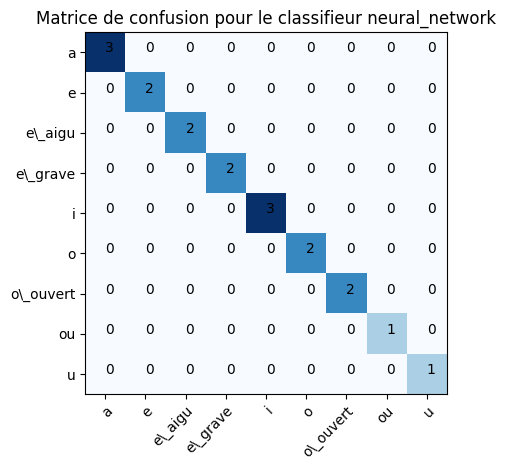

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

# Calcul de la matrice de confusion pour le classifieur neural_network
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7,), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

NN = confusion_matrix(y_test, y_pred)
# print("Matrice de confusion pour le classifieur neural_network :")
# print(NN)

print_confusion_matrix(NN, "Matrice de confusion pour le classifieur neural_network")


## Méthode non supervisée
`
indiquer quelle est la méthode non supervisée de votre choix et calculer la matrice de confusion associée. 

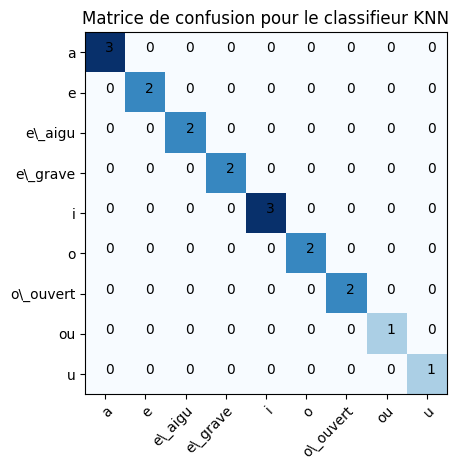

In [31]:
from sklearn.neighbors import NearestNeighbors
# Calcul de la matrice de confusion pour le classifieur non supervisée KNN
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(X_train)
distances, indices = nbrs.kneighbors(X_test)
y_pred = y_train[indices]

KNN = confusion_matrix(y_test, y_pred)
# print("Matrice de confusion pour le classifieur KNN :")
# print(KNN)

print_confusion_matrix(KNN, "Matrice de confusion pour le classifieur KNN")


# Partie II : classification des phonèmes avec prétraitement 


## Méthode supervisée


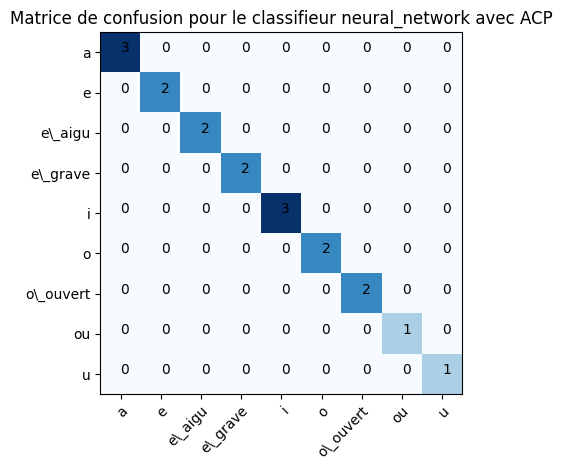

In [32]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
# Calcul de la matrice de confusion pour le classifieur neural_network avec ACP
pca = PCA(n_components=12)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7,), random_state=1, max_iter=1000)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

NN_ACP = confusion_matrix(y_test, y_pred)
# print("Matrice de confusion pour le classifieur neural_network avec ACP :")
# print(NN_ACP)

print_confusion_matrix(
    NN_ACP, "Matrice de confusion pour le classifieur neural_network avec ACP")


## Méthode non supervisée

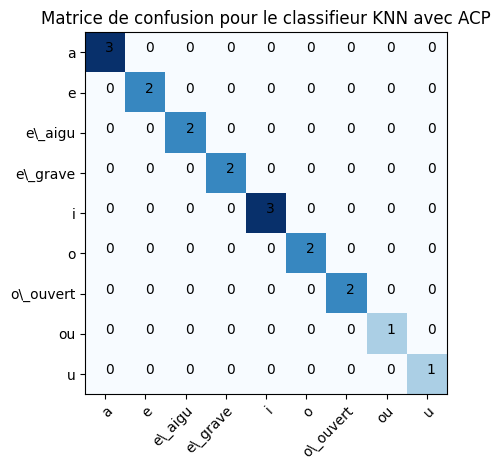

In [33]:
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
# Calcul de la matrice de confusion pour le classifieur non supervisée KNN avec ACP
pca = PCA(n_components=5)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(X_train_pca)
distances, indices = nbrs.kneighbors(X_test_pca)
y_pred = y_train[indices]

KNN_ACP = confusion_matrix(y_test, y_pred)
# print("Matrice de confusion pour le classifieur KNN avec ACP :")
# print(KNN_ACP)

print_confusion_matrix(
    KNN_ACP, "Matrice de confusion pour le classifieur KNN avec ACP")


## Partie III : Analyse des résultats 

Pour chaque résultat obtenu, calculer la matrice de confusion et utiliser le triangle voyellique présenté ci-après pour interpréter les résultats.

<img src="files/triangle_voyellique.jpg" width="600" height="600"  >

## Rappel de la structure de la matrice de confusion :

La matrice de confusion est une matrice $10\times 10$ dont l'élément générique d'indice $(i,j)$ est le nombre de vecteurs de classe correspondant à l'indice $i$ qui ont été affectés à la classe correspondant à l'indice $j$ par le processus de décision. Si la matrice de confusion est diagonale alors la reconnaissance est parfaite.

<img src="files/MatConfus.PNG" width="600" height="400"  >

## Interprétation des résultats :

### Méthode supervisée

Pour la méthode supervisée nous avons choisie le classificateur de reseaux de neurone de la librairie sklearn. Nous avons executer ce classificateur sur un jeux de données non prétraitées et sûr des données prétraitées avec l'aide d'une ACP.
Voici un rappel de la methode d'interprétation des résultats de la matrice de confusion :
- Les lignes correspondent aux classes réelles des phonèmes
- Les colonnes correspondent aux classes prédites par le classifieur

#### Jeux de données non prétraitées

##### Interprétation des résultats

Pour le classificateur avec les données non prétraités, nous avons obtenu une matrice de confusion qui est diagonale. Cela signifie que le classificateur a reconnu tous les phonemes avec une precision de 100%.

##### Matrice de confusion


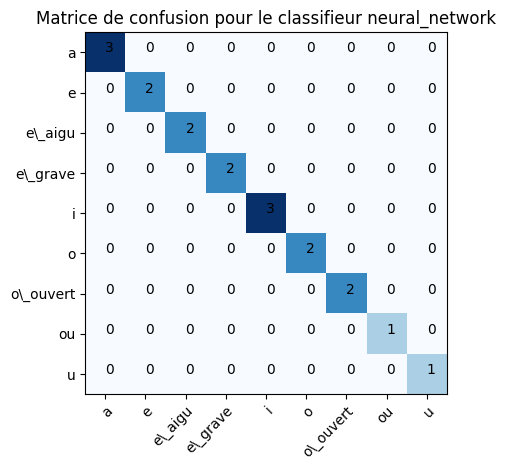

In [34]:
print_confusion_matrix(
    NN, "Matrice de confusion pour le classifieur neural_network")


#### Jeux de données prétraitées

##### Interprétation des résultats

Pour le classificateur avec des données prétraités par une ACP, nous avons essayer plusieurs valeurs de n_components comma parametre de l'ACP afin de trouver la valeur optimale qui nous permettrais d'optenire avec le plus petit n_components une precision le plus proche de 100%, aprés de nouveaux teste nous avons choisie 12 components pour l'acp car elle est la seul valeur qui eu obtenue une precision de 100%. Mais avec un n_components de 12. Cela veux donc dire que si nous voulons garder 100% de precision nous ne pouvons au plus enlever que une seul dimension a nos données.

##### Matrice de confusion

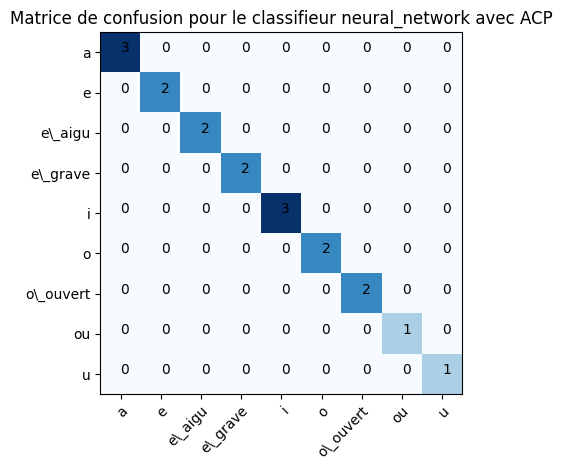

In [35]:
print_confusion_matrix(
    NN_ACP, "Matrice de confusion pour le classifieur neural_network avec ACP")


Si nous choisissons tous de même de prendre un n_components equal a 3 nous arrivons a obtenir une matrice de confusion qui est diagonale avec une precision de 90% ce qui reste un bon resultat mais avec quelques erreurs. Nous pouvons voir que le phoneme 'a' est classé comme 'o\_ouvert' et le phoneme 'e' est classé comme 'u' ce qui est logique car ces deux phonemes sont proches dans le triangle voyellique. Donc a cause de la perte de données due a l'ACP nous avons obtenue c'est erreurs.

##### Matrice de confusion

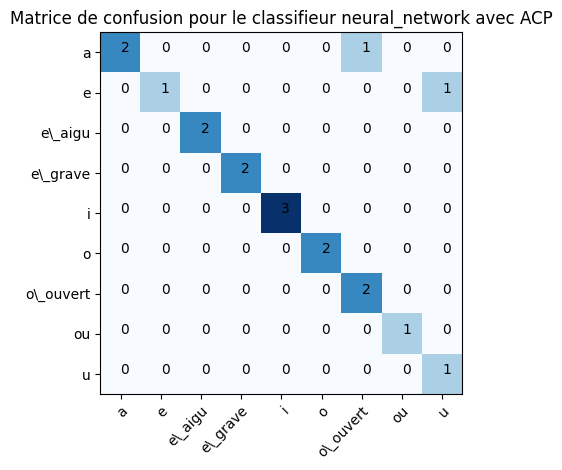

In [36]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
# Calcul de la matrice de confusion pour le classifieur neural_network avec ACP
pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(7,), random_state=1, max_iter=1000)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

NN_ACP_BIS = confusion_matrix(y_test, y_pred)
# print("Matrice de confusion pour le classifieur neural_network avec ACP :")
# print(NN_ACP)

print_confusion_matrix(
    NN_ACP_BIS, "Matrice de confusion pour le classifieur neural_network avec ACP")
